## Import necessary libraries

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import ndreg
from ndreg import preprocessor, util
import SimpleITK as sitk
import numpy as np

In [4]:
def myshow(img, cmap='gray', colorbar=False):
    plt.imshow(sitk.GetArrayViewFromImage(img), cmap=cmap)
    if colorbar: plt.colorbar()
    plt.axis('off')
    plt.show()

In [5]:
def normalize(img, percentile=0.99):
    max_val = ndreg.imgPercentile(img, percentile)
    return sitk.Clamp(img, upperBound=max_val) / max_val

### Load the sample data

In [9]:
img = util.imgRead('/Users/vikramchandrashekhar/ndreg/sample.png')

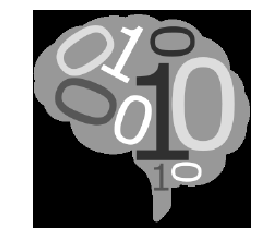

In [10]:
plt.imshow(sitk.GetArrayViewFromImage(img), cmap='gray')
plt.axis('off')
plt.show()

### Load the sample transformed image

In [13]:
img_transformed = util.imgRead('/Users/vikramchandrashekhar/ndreg/sample_affine_transformed.png')

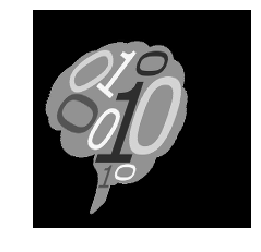

In [14]:
plt.imshow(sitk.GetArrayFromImage(img_transformed), cmap='gray')
plt.axis('off')
plt.show()

### Registration
We want to obtain the parameters to transform the original image to the new image. The transformation from the original image to the new image can be described as an affine transformation which can parametrize a transformation that contains translation, scaling, rotation, and shear. 

In [16]:
final_transform = ndreg.register_affine(img, img_transformed, learning_rate=4.0, verbose=False)

## Apply computed transform to original image

In [18]:
corrected_img = ndreg.resample(img, final_transform, img_transformed)

## Visualize registered image

The two images below should match if the registration worked successfully!

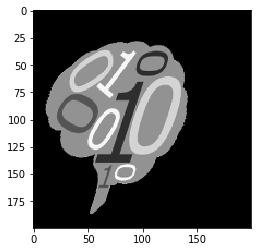

In [19]:
plt.imshow(sitk.GetArrayViewFromImage(corrected_img), cmap='gray')
plt.show()

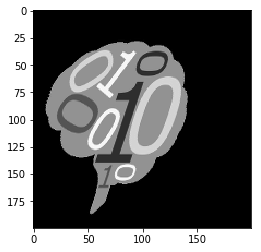

In [20]:
plt.imshow(sitk.GetArrayViewFromImage(img_transformed), cmap='gray')
plt.show()

# Test Lddmm

In [22]:
img_warped = util.imgRead('/Users/vikramchandrashekhar/ndreg/sample_warped.png')

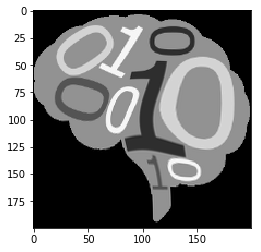

In [23]:
plt.imshow(sitk.GetArrayViewFromImage(img_warped), cmap='gray')
plt.show()

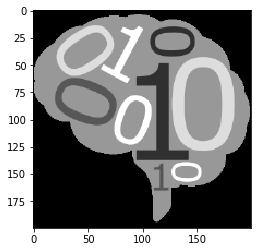

In [24]:
plt.imshow(sitk.GetArrayViewFromImage(img), cmap='gray')
plt.show()

In [25]:
img_lddmm, field, inv_field = ndreg.register_lddmm(img, img_warped, scale_list=[0.5,1.0], 
                                      alpha_list=0.01, epsilon_list=3e-9, sigma=0.05)


Step 0: alpha=0.01, beta=0.05, scale=0.5
/bin/sh: /Users/vikramchandrashekhar/ndreg/ndreg/metamorphosis: No such file or directory


Exception: /bin/sh: /Users/vikramchandrashekhar/ndreg/ndreg/metamorphosis: No such file or directory


# Compare warped image and LDDMM image

### warped image

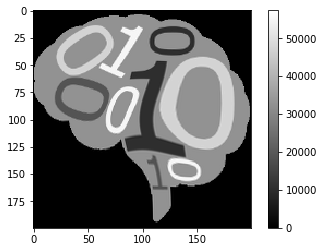

In [21]:
plt.imshow(sitk.GetArrayViewFromImage(img_warped), cmap='gray')
plt.colorbar()
plt.show()

### lddmm image

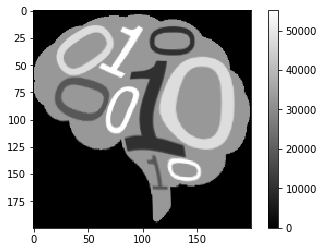

In [22]:
plt.imshow(sitk.GetArrayViewFromImage(img_lddmm), cmap='gray')
plt.colorbar()
plt.show()

In [23]:
difference_image = (normalize(img_lddmm) - normalize(img_warped))**2

# Quantitative evaluation

The closer this image is to all 0s, the better the match of the two images. Since the image below is almost all black, we can qualitatively say that the registration quality is very high. In order to quantify

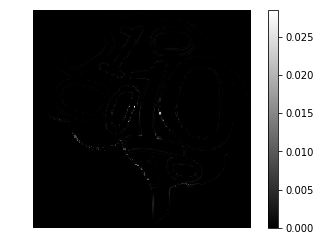

In [24]:
myshow(difference_image,colorbar=True)

In [28]:
print("Registration error is: {} voxels^2".format(registerer.imgMSE(normalize(img_lddmm), normalize(img_warped))))

Registration error is: 8.50227248315e-05 voxels^2
